In [1]:
!pip install diffusers
!pip install transformers
!pip install torch
!pip install huggingface_hub

In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
import os
os.environ['HuggingFaceHub_API_Token'] = ""

In [4]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from PIL import Image
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [5]:
model = "stabilityai/stable-diffusion-2-1"

In [6]:
# model - this will load weights and torch_dtype = float32 to convert model weights for optimized performance to float16 dtype.
pipe = StableDiffusionPipeline.from_pretrained(model, torch_dtype = torch.float32)

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [7]:
# The DPMSolverMultistepScheduler is designed to accelerate the image generation process
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

In [8]:
# Move pipeline to GPU
pipe = pipe.to("cuda")

In [9]:
prompt = "A scenic landscape with a red car near river."
negative_prompt = "low quality, black and white, ugly, painting, cartoon"
image = pipe(prompt, negative_prompt = negative_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

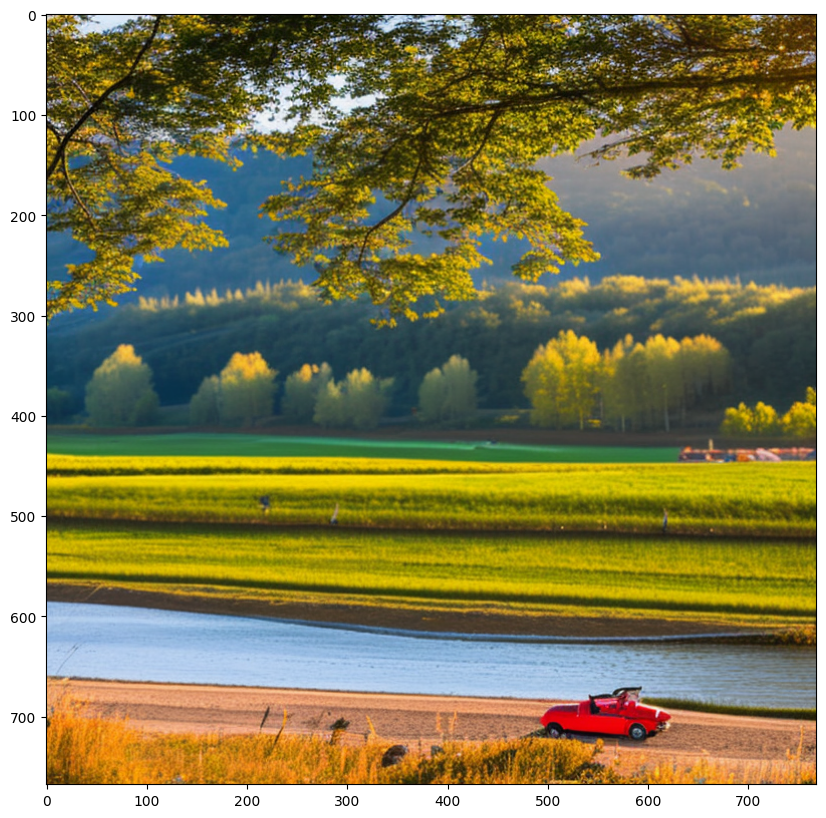

In [10]:
plt.figure(figsize = (25,10))
plt.imshow(image.images[0])
plt.show()

In [11]:
prompt = "A fierce warrior wearing intricate armor with glowing runes, holding a massive sword, standing in a battlefield with dramatic lighting and smoke."
negative_prompt = "blurry, low quality, ugly, painting, cartoonish, poorly detailed, painting-like, black and white"
image = pipe(prompt, negative_prompt = negative_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

In [12]:
plt.figure(figsize = (25,10))
plt.imshow(image.images[0])
plt.show()

In [13]:
prompt = "A majestic tiger walking through a dense jungle with sunlight filtering through the leaves, detailed fur, and detailed image."
negative_prompt = "blurry, low quality, ugly, painting, cartoonish, poorly detailed, painting-like, black and white"
image = pipe(prompt, negative_prompt = negative_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

In [14]:
plt.figure(figsize = (25,10))
plt.imshow(image.images[0])
plt.show()

In [15]:
prompt = "A surreal dreamscape with floating islands, waterfalls flowing into the sky, vibrant colors, and a starry galaxy background."
negative_prompt = "blurry, low quality, ugly, painting, cartoonish, poorly detailed, painting-like, black and white"
image = pipe(prompt, negative_prompt = negative_prompt)


  0%|          | 0/50 [00:00<?, ?it/s]

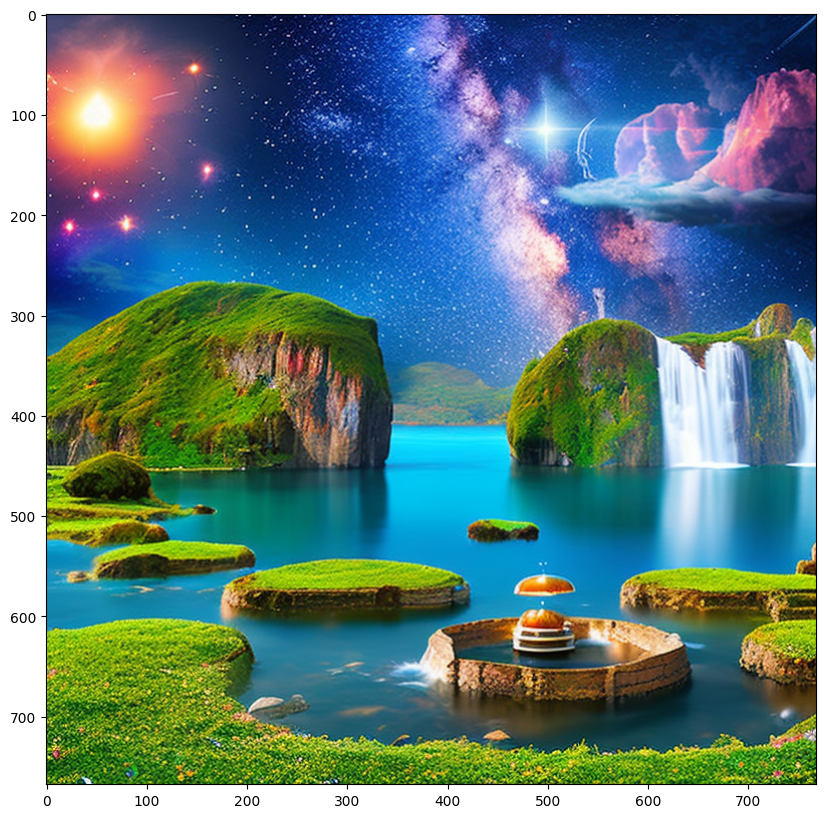

In [16]:
plt.figure(figsize = (25,10))
plt.imshow(image.images[0])
plt.show()